In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2
import seis_model

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [2]:
data2=kgs.load_all_test_data()
#data2=kgs.load_all_train_data()

In [3]:
df = kgs.dill_load(kgs.temp_dir + '/style_B_df.pickle')
tr = df['is_train']
ntr = np.logical_not(df['is_train'])
df2 = df[ntr].sort_values('seis_err_rms', ascending=False)
print(df2)
data = []
for cn in df2['cache_name'][:50]:
    for d in data2:
        if d.cache_name() == cn:
            #print(cn)
            data.append(d)

                  cache_name  is_train  update_mae  score_brendan  score  \
1200  26d2a1994c__test__None     False   94.792983            NaN    NaN   
884   19eb0fde7c__test__None     False  125.170752            NaN    NaN   
2995  709e56eade__test__None     False  109.300089            NaN    NaN   
4003  979c46eacc__test__None     False  100.645647            NaN    NaN   
1127  23cab121ce__test__None     False  100.236637            NaN    NaN   
...                      ...       ...         ...            ...    ...   
4508  ab2bf1e01f__test__None     False   29.316698            NaN    NaN   
4459  a93edf49db__test__None     False   18.437182            NaN    NaN   
5026  c05ca39bc2__test__None     False   41.191082            NaN    NaN   
3161  77521fe145__test__None     False   36.547031            NaN    NaN   
4993  bf07ea7688__test__None     False   18.837513            NaN    NaN   

                seis_err_rms  seis_err_rms_brendan  
1200  0.00021235294911382845  0.03

capturing graph


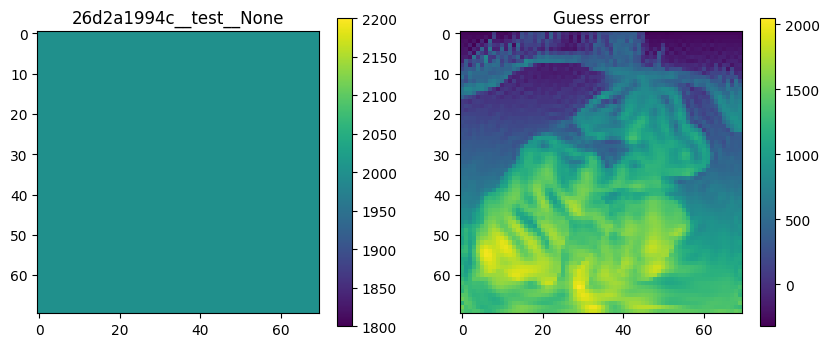

diag 0.5418760240739057
capturing graph
MAE update:  64.88208774826633


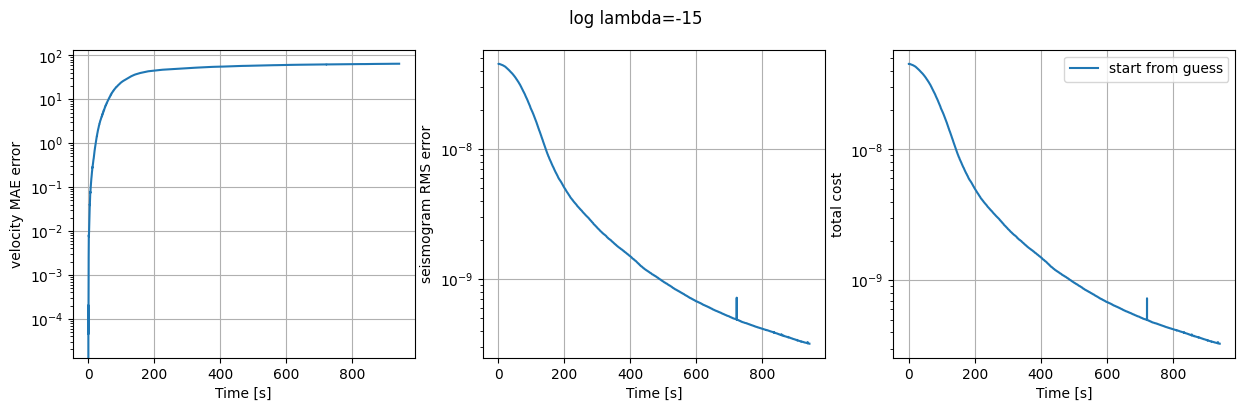

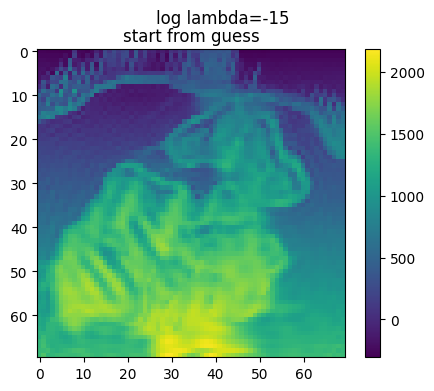

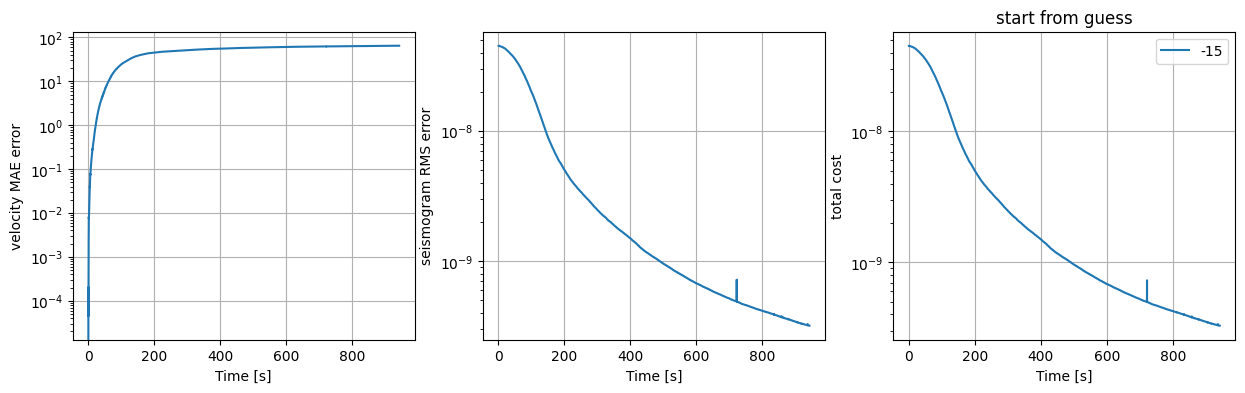

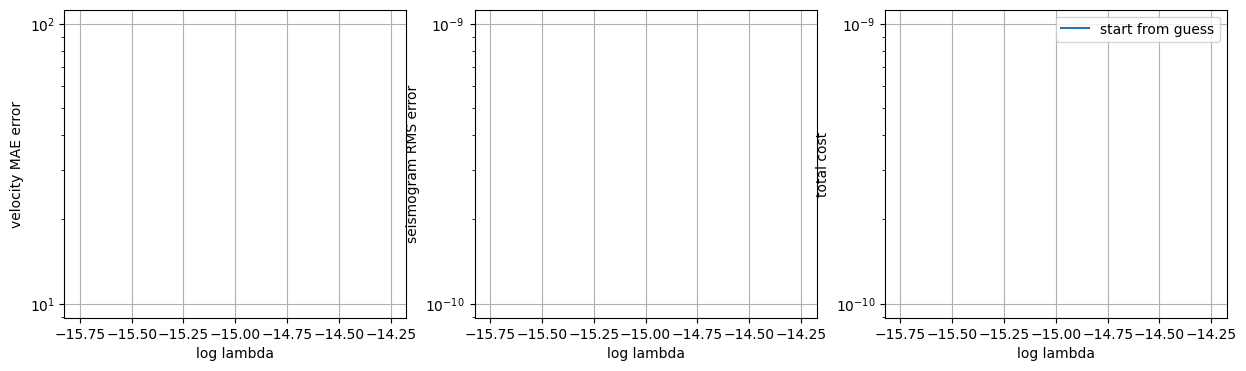

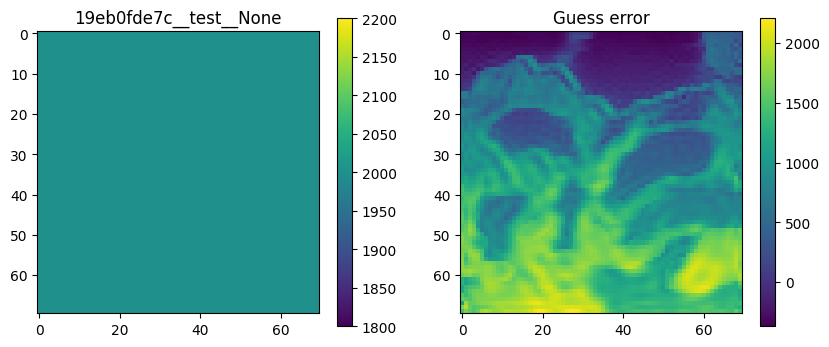

diag 1.1553283144495008
MAE update:  57.90306884100966


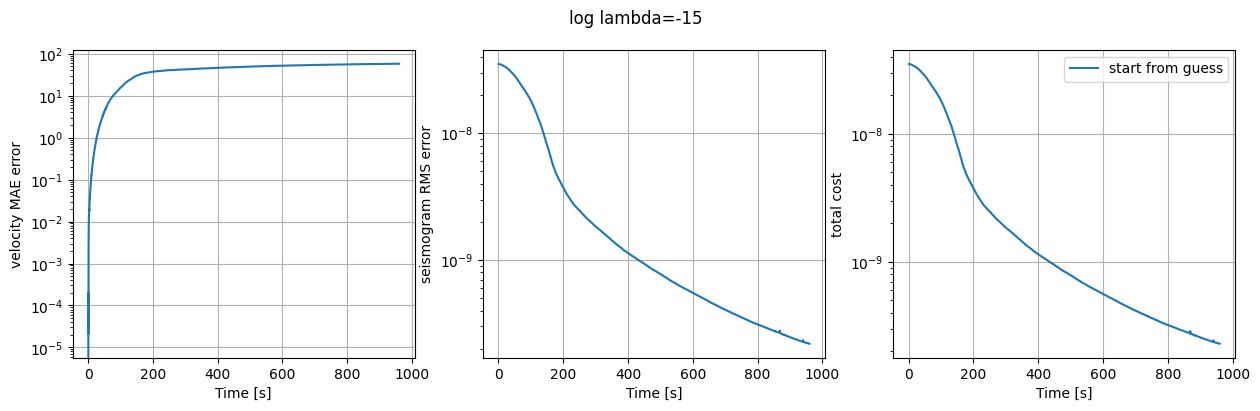

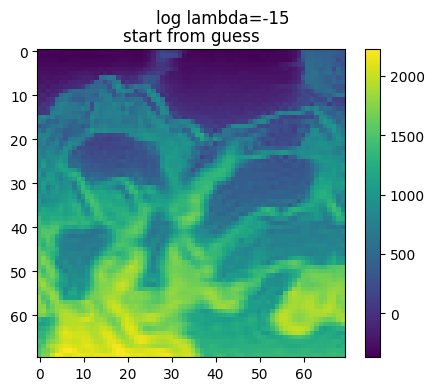

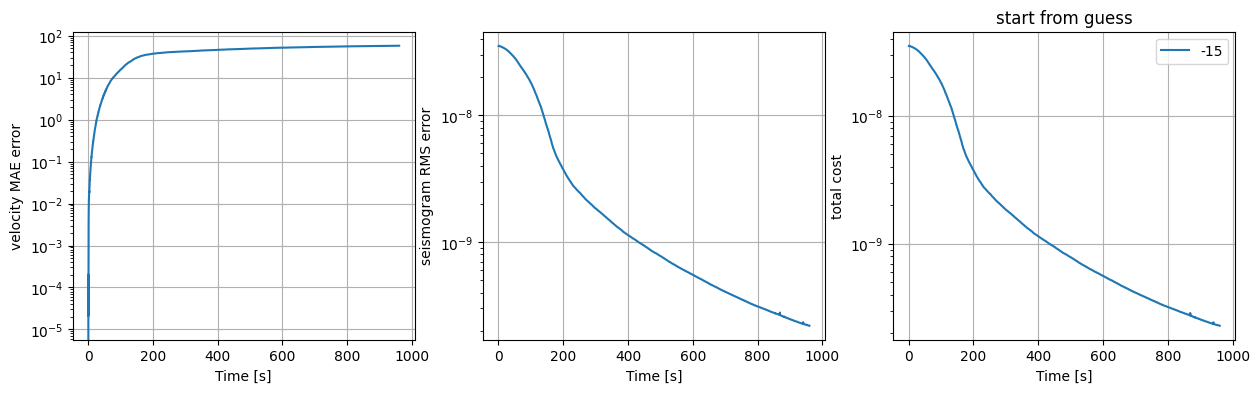

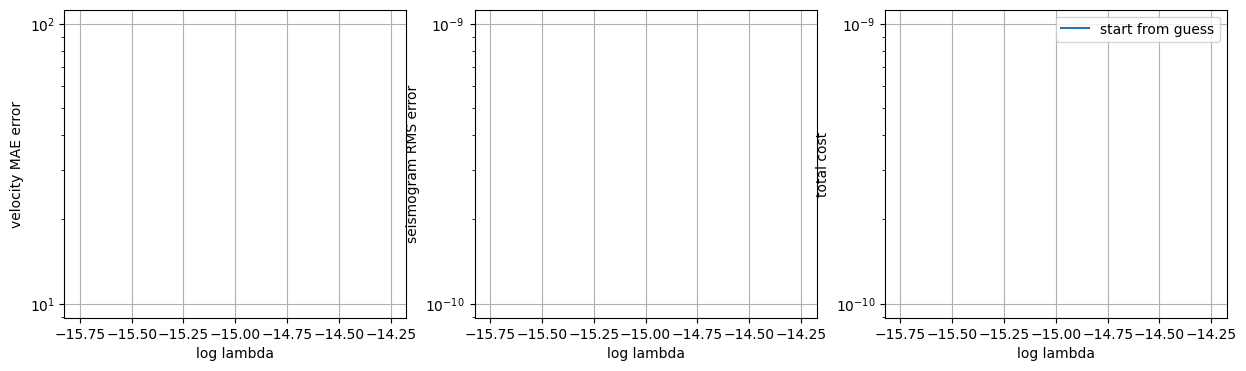

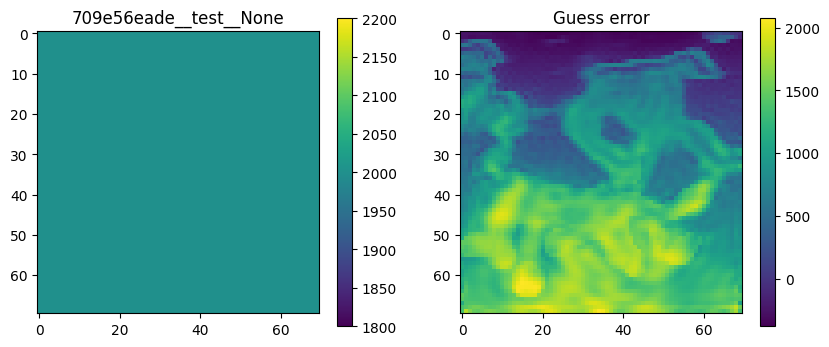

diag 1.1267775394568837


KeyboardInterrupt: 

In [4]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
importlib.reload(seis_model)
import seis_nn
kgs.profiling=False
seis_invert.profiling=False
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
xx = copy.deepcopy(seis_model.default_model())
model = copy.deepcopy(xx.models[1].model_Style_B)
model.show_convergence = True
model.iter_list = [6000]
model.seis_error_tolerance = 1e-10
#model.prior.noise = 0.6
#model.prior.transform = False
#model.prior.svd_cutoff = -1.
#model.prior.λ = 10**-12

start_model = copy.deepcopy(xx.models[1].model_Style_B)

del xx

do_which_list = [False,False,True]

def param_func(model,value):
    model.prior.λ = 10**value
    return model
    
param_values = [-15]
param_name = "log lambda"


for d in data:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0., start_model = start_model)